# **<center>Recherche Opérationnelle<br /> Projet </center>**

<center> RUDONI Antonin, SIMON Thomas, AMIRBEKYAN Alen, AFANVI Kodjo Roland </center>

# **Introduction**
L'Agence de l'Environnement et de la Maîtrise de l’Énergie (ADEME) a lancé un appel à manifestation d’intérêt pour promouvoir de nouvelles solutions de mobilité durable adaptées à différents territoires. Notre structure, CesiCDP, spécialiste en Mobilité Multimodale Intelligente, répondons à cet appel en s'appuyant nos études antérieures et notre expertise en technologies de transport économiques et écologiques.

Notre objectif est de minimiser les déplacements et la consommation des véhicules lors des livraisons en résolvant un problème algorithmique classique : calculer une tournée optimale sur un réseau routier (VRP) reliant plusieurs villes et revenant au point de départ, tout en minimisant la durée totale. Cette solution est applicable à divers domaines tels que la distribution du courrier, la livraison de produits, et le ramassage des ordures, avec un impact environnemental significatif.

# **Périmètre**

## **Besoins**
Réduire les coûts de transport et les émissions de gaz à effet de serre en optimisant les itinéraires de livraison.

## **Reformulation du problème**
Le problème peut être défini comme suit : étant donné k camions et n villes, 
trouver l'itinéraire optimal pour chaque camion de manière à ce que la distance totale parcourue soit minimisée.

## **Choix de modélisation** 
Pour modéliser ce problème, nous utilisons un graphe non orienté.

### **Représentation Graphique**
- Sommets : Les villes à visiter
- Poids des arêtes : La distance entre deux villes
- Arêtes : Les chemins possibles entre les villes

### **Choix du type de données en entrée**

Les données en entrée incluent :

- La liste des villes à visiter
- Les distances entre chaque paire de villes
- La capacité des camions
- Le nombre de camions disponibles

# **Représentation Graphique** 

Graphe : 
- Sommets -> Villes 
- Poids des arêtes -> Distance entre 2 villes 
- Arêtes -> Chemin entre les villes 



#### **Exemple de représentation par un graphe de ville lié par des routes**
<img src="graphe.png" alt="Description de l'image" style="width:50%;"/>


# **Complexité**

## Definition du problème d'optimisation 
Le problème de la tournée de véhicules (VRP) consiste à trouver le parcours optimal pour $k$ camions afin de visiter $n$ villes, en minimisant la distance totale parcourue tout en assurant que chaque ville soit visitée exactement une fois.

## Problème de décision associé 
Existe-t-il une solution pour $k$ camions visitant $n$ villes où la distance totale parcourue ne dépasse pas une valeur donnée ?

## Démonstration VRP par rapport a cycle hamiltonienne
Le VRP est une généralisation de TSP, qui est un problème classique en théorie de la complexité. TSP demande de trouver le plus court chemin passant par un ensemble de villes et revenant à la ville de départ. Il a été prouvé que le TSP est NP-complet en se basant sur le problème du cycle hamiltonien.

## Réduction du TSP au VRP
Transformation : On peut transformer n'importe quelle instance du TSP en une instance du VRP avec $k$ = 1. Si on peut résoudre VRP, on peut résoudre TSP en définissant un seul camion pour parcourir toutes les villes.
Preuve de NP-complétude du VRP : Puisque le TSP est un cas particulier du VRP, et étant donné que le TSP est NP-complet, il s'ensuit que le VRP est au moins aussi difficile que le TSP. Par conséquent, le VRP est également NP-complet.

## Appartenance à NP 
Pour montrer que le VRP appartient à NP, il suffit de vérifier qu'une solution donnée peut être vérifiée en temps polynomial.
On peut en temps polynomial vérifier :

Que chaque ville est visitée exactement une fois.
Que la distance totale parcourue est calculée correctement et ne dépasse pas une valeur donnée.
Ainsi, le VRP appartient à NP, et étant donné que le VRP est au moins aussi difficile que le TSP, nous concluons que le VRP est NP-difficile.

## Démonstration 

### Réduction du problème du Cycle Hamiltonien au TSP

Pour transformer une instance du problème du Cycle Hamiltonien \(G = (V, E)\) en une instance du problème du TSP :

**Construction du graphe complet** :
   - Création un graphe complet \(G' = (V, E')\), où chaque paire de nœuds est connectée par une arête.
   - Le nombre de nœuds dans \(G'\) est le même que dans \(G\).

**Ajout des arêtes et des coûts** :
   - Ajout chaque nœud \(v\) à \(V'\) en \(O(1)\).
   - Pour chaque paire de nœuds \((u, v)\), vérifier si \((u, v)\) est une arête dans \(G\). Cette vérification se fait en temps constant \(O(1)\).
   - Ajout des coûts aux arêtes :
     - Si \((u, v)\) est une arête dans \(G\), attribuer un coût de 1.
     - Sinon, attribuer un coût très élevé (infini).

**Complexité** :
   - La transformation de \(G\) en \(G'\) se fait en \(O($n^2$)\), où \(n\) est le nombre de sommets, car chaque paire de nœuds est vérifiée et connectée.

Ainsi, cette transformation garantit que le problème du Cycle Hamiltonien peut être converti en une instance du TSP en temps polynomial.


## Algorithme de certificat de TSP

In [27]:
from math import sqrt

def calculate_distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def is_valid_tsp_solution(coordinates, tour):
    num_cities = len(coordinates)
    visited = [False] * num_cities

    print(f"Vérification de la tournée: {tour}")

    # Chaque tournée commence par le depot
    if tour[0] != tour[-1]:
        print("La tournée ne commence ou ne finit pas au même point.")
        return False

    for i in range(len(tour) - 1):
        from_city = tour[i]
        to_city = tour[i + 1]

        # Chaque ville doit être visitée exactement une fois
        if visited[from_city]:
            print(f"La ville {from_city} est visitée plus d'une fois.")
            return False
        
        distance = calculate_distance(coordinates[from_city], coordinates[to_city])
        
        # Distance non nulle entre chaque paire de villes successives
        if distance == 0 and from_city != to_city:
            print(f"Il n'y a pas de distance entre {from_city} et {to_city}.")
            return False

        # Marque la ville comme visitée
        visited[from_city] = True  

    # Vérifie que toutes les villes ont été visitées exactement une fois
    if not all(visited):
        print("Toutes les villes n'ont pas été visitées.")
        return False

    # Vérification de retour au depot
    distance = calculate_distance(coordinates[tour[-2]], coordinates[tour[-1]])
    if distance == 0 and tour[-2] != tour[-1]:
        print(f"Il n'y a pas de distance entre {tour[-2]} et {tour[-1]}.")
        return False

    return True

# Exemple
coordinates = [
    (0, 0),  # Dépôt
    (1, 2),  
    (4, 0), 
    # (3,3), 
    (6, 3)   
]

tour = [0, 1, 3, 2, 0]  

print(is_valid_tsp_solution(coordinates, tour))


Vérification de la tournée: [0, 1, 3, 2, 0]
True


## Pire des cas
### Complexité asymptotique 

Dans le pire des cas, le nombre de solutions potentielles du VRP augmente de manière exponentielle avec le nombre de villes et de camions. 
Pour :

- $n$ villes et $k$ camions, il existe O($k^n$) manières de répartir les villes entre les camions
- Chaque répartition, il faut trouver l'itinéraire optimal pour chaque camion, ce qui est un problème de TSP pour chaque sous-ensemble de villes

La complexité asymptotique du VRP est donc exprimée comme exponentielle en fonction du nombre de villes, rendant le problème impraticable pour de grandes instances.


# **Modèle mathématique**

$n$ : Le nombre total de villes à visiter</br>
$k$ : Le nombre total de véhicules disponibles</br>
$c_{ij}$ : Le coût est la distance pour aller de la ville $i$ à la ville $j$</br>
$x_{ij}^k$ : Variables de décision, qui permet de savoir si $k$ emprunte l'arête $(i, j)$</br>
$u_i$ : Variable continue représentant l'ordre de visite de la ville $i$.</br>

$\min \sum\limits_{k \in K} \sum\limits_{i \in N} \sum\limits_{j \in N} c_{ij} x_{ij}^k$</br>

## Contraintes :</br>

Visite unique des villes : </br>

$\sum\limits_{k \in K} \sum\limits_{j \in N} x_{ij}^k = 1 \quad \forall i \in N, i \neq 0$</br>

Entrée puis sortie dans chaque ville :</br>

$\sum\limits_{j \in N} x_{ij}^k = \sum\limits_{j \in N} x_{ji}^k \quad \forall k \in K, \forall i \in N$</br>

Chaque véhicule doit commencer et se terminer au dépôt :</br>

$\sum\limits_{j \in N} x_{0j}^k = 1 \quad \forall k \in K$</br>
$\sum\limits_{i \in N} x_{i0}^k = 1 \quad \forall k \in K$</br>

Empêche la formation de sous-tours en utilisant les contraintes de Miller-Tucker-Zemlin (MTZ) :</br>

$u_i - u_j + n x_{ij}^k \leq n-1 \quad \forall i, j \in N, i \neq j, k \in K$</br>
$1 \leq u_i \leq n \quad \forall i \in N, i \neq 0$</br>

Les variables de décision sont binaires :</br>


$x_{ij}^k \in \{0, 1\} \quad \forall i, j \in N, k \in K$</br>


# **Choix et implémentation d'une heuristique**


46.248077692850245


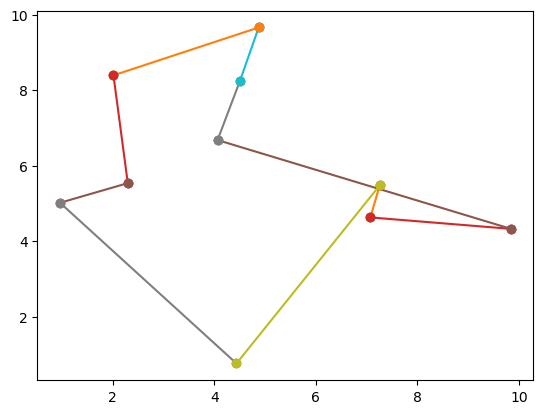

In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from random import random


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.voision = []

    def arc(self, pointB, plt):
        if self != pointB:
            plt.plot((self.x, pointB.x), (self.y, pointB.y), marker = 'o')

    def sommet(self, plt):
        plt.plot(self.x, self.y,'o')
    
    def distance(self, pointB):
        return sqrt((self.x - pointB.x)**2  + (self.y - pointB.y)**2)

points = []

for i in range(10):
    points.append(Point(x=random()*10, y=random()*10))

def tsp(depart, points, distanceTotal = 0, pointsparc = []):
    pointsparc.append(depart)
    if len(pointsparc) == 10:
        return (distanceTotal + pointsparc[-2].distance(depart), pointsparc)
    
    min = 1000000000000
    voisin = None
    for p in points:
        if not p in pointsparc:
            distance = depart.distance(p)
            if distance < min:
                min = distance
                voisin = p
    
    return tsp(voisin, points, distanceTotal+distance, pointsparc)

res = tsp(points[0], points)

distance = res[0]

for i in range(len(res[1])-1):
    res[1][i].sommet(plt)
    res[1][i].arc(res[1][i+1], plt)

res[1][0].arc(res[1][-1], plt)

print(distance)

# for p in points:
#     p.sommet(plt)
#     points[5].arc(p, plt)

plt.show()

# **Références**
1 : Malapert, A. (2006). Optimisation de tournées de véhicules pour l’exploitation de Réseau Telecom. Rapp. Stage Diplôme Master Intell. Artif. Décision Univ. Paris, 6.

2 : Bederina, H. (2018). Problèmes de tournées de véhicules robustes multi-objectifs (Doctoral dissertation, Université de Picardie Jules Verne).

3 : http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf 

4 : https://www.lri.fr/~jcohen/documents/enseignement/VoyageurDeCommerce.pdf

## Data sets: Données générées aléatoirement et données réelles choisies de Google Maps

- Génération de données aléatoires  (Alen)

- Génération de données à partir de la carte 



/var/folders/2c/1mx6slb13kd32blvc0xj6n5r0000gn/T/ipykernel_1365/3798061446.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df["X"][i], df["Y"][i], city, fontsize=12)


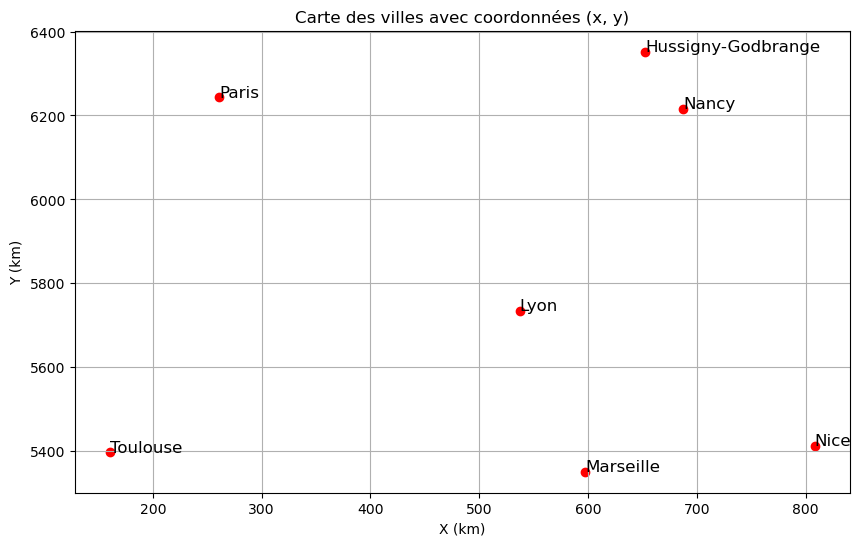

In [29]:
from geopy.geocoders import Nominatim
import pandas as pd
import math
import matplotlib.pyplot as plt

geolocator = Nominatim(user_agent="vrp_project")

def get_coordinates(city_name):
    location = geolocator.geocode(city_name + ", France")
    return (location.latitude, location.longitude) if location else (None, None)

depot = "Paris"
depot_coordinates = get_coordinates(depot)

cities = ["Lyon", "Marseille", "Toulouse", "Nice", "Hussigny-Godbrange", "Nancy"]
coordinates = [get_coordinates(city) for city in cities]

coordinates.insert(0, depot_coordinates)
cities.insert(0, depot)

df = pd.DataFrame(coordinates, columns=["Latitude", "Longitude"], index=cities)

def latlon_to_xy(lat, lon):
    R = 6371  # Rayon de la Terre en km
    x = R * math.radians(lon)
    y = R * math.log(math.tan(math.pi/4 + math.radians(lat)/2))
    return (x, y)

df["X"], df["Y"] = zip(*df.apply(lambda row: latlon_to_xy(row["Latitude"], row["Longitude"]), axis=1))

def plot_cities(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df["X"], df["Y"], color='red')

    for i, city in enumerate(df.index):
        plt.text(df["X"][i], df["Y"][i], city, fontsize=12)
    
    plt.title("Carte des villes avec coordonnées (x, y)")
    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.grid(True)
    plt.show()

plot_cities(df)


## Solveur

In [8]:
# py

## Plan d'expérience

### Instances faciles

### Instances moyennes

### Instances difficiles

## Études expérimentales et analyse du solveur

## Conclusion 

### Rés + ccl 

###  Perspectives d'amélioration